In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import warnings 
warnings.filterwarnings('ignore')

# Assuming you have loaded the mcdonalds data using pandas
mcdonalds = pd.read_csv("mcdonalds.csv")
mcdonalds.sample(5)



,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1030,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,0,34,Once a year,Female
585,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+2,37,Once a month,Male
146,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,I love it!+5,19,Once a week,Male
230,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+4,35,Once a week,Female
155,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,65,Every three months,Female


In [2]:
# Equivalent Python code for Step 4
MD_x = mcdonalds.iloc[:, 1:12].values
MD_x = (MD_x == "Yes").astype(int)
print("Column Means:")
print(np.round(np.mean(MD_x, axis=0), 2))



Column Means:
[0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24 0.  ]


In [3]:
# PCA
MD_pca = PCA()
MD_pca.fit(MD_x)
print("PCA Summary:")
print("Explained variance ratio:", MD_pca.explained_variance_ratio_)
print("PCA Components:")
print(MD_pca.components_)



PCA Summary:
Explained variance ratio: [0.29520695 0.19285645 0.13108809 0.09509127 0.06417841 0.05661601
 0.04852102 0.04541652 0.03731004 0.03371524 0.        ]
PCA Components:
[[-0.15222071 -0.00132849  0.13175506  0.35042294 -0.13435956 -0.51012708
  -0.35886306  0.51181853 -0.2074227   0.35302161  0.        ]
 [ 0.06712002  0.01462136 -0.18689384 -0.45473366 -0.05349595 -0.50171502
   0.37391704  0.44668359  0.22105571 -0.33284159  0.        ]
 [-0.17642248 -0.0655621  -0.27131751 -0.65159168 -0.09791477  0.00606812
  -0.62631558 -0.10988566  0.08170572  0.21388267  0.        ]
 [-0.11427391  0.21133138 -0.34343557  0.29494215 -0.08272792  0.11038836
   0.0621956   0.08082229  0.77873682  0.31856018 -0.        ]
 [-0.15940701  0.09169811  0.14010445 -0.33748334  0.03083033  0.13742978
   0.51862889  0.08714178 -0.21206419  0.70091249  0.        ]
 [-0.38889408 -0.24291352 -0.43287131  0.15865381 -0.61659312 -0.08426298
   0.23749281 -0.24709203 -0.25896685 -0.07346666 -0.        ]

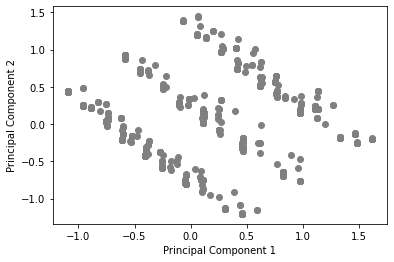

In [4]:
# PCA plot
plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], c='grey')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()



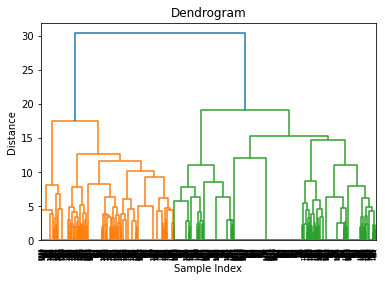

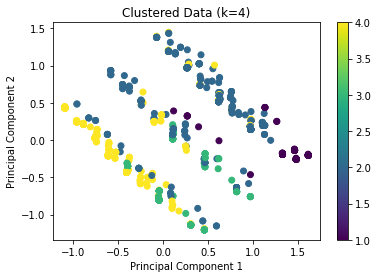

In [5]:
# Hierarchical Clustering
MD_linkage = linkage(MD_x, method='ward')
dendrogram(MD_linkage)
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.show()

# Clustering using hierarchical clustering
k = 4  # Number of clusters
MD_k4 = fcluster(MD_linkage, k, criterion='maxclust')

# Plotting clustered data
plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], c=MD_k4, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clustered Data (k=4)")
plt.colorbar()
plt.show()

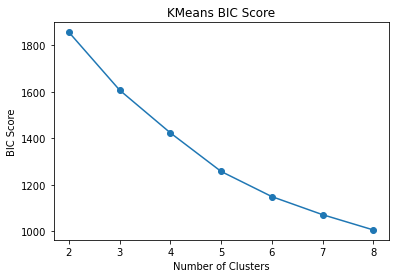

In [6]:
from sklearn.cluster import KMeans
from pgmpy.estimators import MaximumLikelihoodEstimator

k_range = range(2, 9)
BIC_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(MD_x)
    BIC_scores.append(kmeans.inertia_)

plt.plot(k_range, BIC_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.title('KMeans BIC Score')
plt.show()




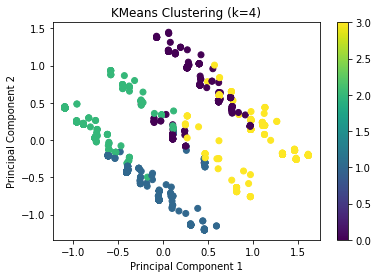

In [7]:
k = 4

kmeans = KMeans(n_clusters=k, random_state=1234)
MD_k4 = kmeans.fit_predict(MD_x)

# Plotting clustered data
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans Clustering (k=4)")
plt.colorbar()
plt.show()




In [8]:
kmeans = KMeans(n_clusters=k, random_state=1234)
MD_k4 = kmeans.fit_predict(MD_x)
mcdonalds['Cluster'] = MD_k4

print("Cluster Assignments:")
print(mcdonalds[['Cluster', 'Like', 'Gender']])

cluster_means = mcdonalds.groupby('Cluster').mean()
print("Cluster Means:")
print(cluster_means)

Cluster Assignments:
      Cluster          Like  Gender
0           1            -3  Female
1           0            +2  Female
2           0            +1  Female
3           1            +4  Female
4           1            +2    Male
...       ...           ...     ...
1448        3  I hate it!-5    Male
1449        2            +2  Female
1450        0            +3  Female
1451        2            +4    Male
1452        3            -3    Male

[1453 rows x 3 columns]
Cluster Means:
               Age
Cluster           
0        40.640379
1        43.077083
2        47.749403
3        47.443038


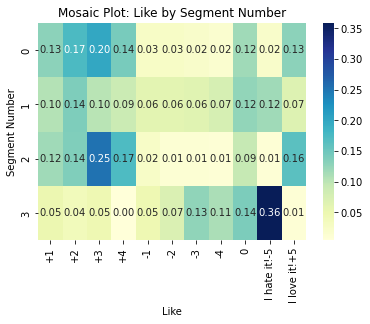

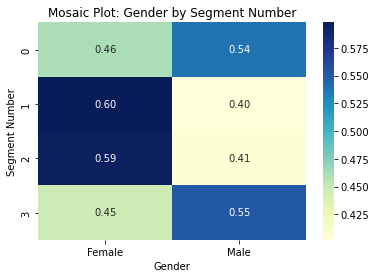

In [9]:
import seaborn as sns

# Mosaic plot for 'Like' by segment number
mosaic_like = pd.crosstab(mcdonalds['Cluster'], mcdonalds['Like'], normalize='index')
sns.heatmap(mosaic_like, annot=True, cmap='YlGnBu', fmt='.2f')
plt.xlabel('Like')
plt.ylabel('Segment Number')
plt.title('Mosaic Plot: Like by Segment Number')
plt.show()

# Mosaic plot for 'Gender' by segment number
mosaic_gender = pd.crosstab(mcdonalds['Cluster'], mcdonalds['Gender'], normalize='index')
sns.heatmap(mosaic_gender, annot=True, cmap='YlGnBu', fmt='.2f')
plt.xlabel('Gender')
plt.ylabel('Segment Number')
plt.title('Mosaic Plot: Gender by Segment Number')
plt.show()

